## load an object detection model from the tensorflowhub and use it for inference  

we'll use the tensorflow link to load the model. we'll first use the tf model (with the link), and then the tflite model, loaded from a locally saved .tflite file. to go directly to the part where the model is loaded from a .tflite file, click [here](#1)

In [33]:
import tensorflow_hub as hub
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
# efficientdet/lite0
model = hub.KerasLayer("https://tfhub.dev/tensorflow/efficientdet/lite0/detection/1")

In [3]:
model.get_config()

{'name': 'keras_layer',
 'trainable': False,
 'dtype': 'float32',
 'handle': 'https://tfhub.dev/tensorflow/efficientdet/lite0/detection/1'}

#### coco 2017 labels from the paper 

In [4]:
labels = ['person','bicycle','car','motorcycle','airplane','bus','train','truck','boat','traffic light','fire hydrant','street sign','stop sign','parking meter','bench','bird','cat','dog','horse','sheep','cow','elephant','bear','zebra','giraffe','hat','backpack','umbrella','shoe','eye glasses','handbag','tie','suitcase','frisbee','skis','snowboard','sports ball','kite','baseball bat','baseball glove','skateboard','surfboard','tennis racket','bottle','plate','wine glass','cup','fork','knife','spoon','bowl','banana','apple','sandwich','orange','broccoli','carrot','hot dog','pizza','donut','cake','chair','couch','potted plant','bed','mirror','dining table','window','desk','toilet','door','tv','laptop','mouse','remote','keyboard','cell phone','microwave','oven','toaster','sink','refrigerator','blender','book','clock','vase','scissors','teddy bear','hair drier','toothbrush','hair brush']

#### get the prediction 

In [5]:
def get_prediction(model, img_path):
    image = Image.open(img_path)
    imagetensor = tf.convert_to_tensor(image, dtype=tf.uint8, dtype_hint=None, name=None)
    imagetensor_reshaped = tf.expand_dims(imagetensor, axis=0, name=None)
    output = model(imagetensor_reshaped)
    return output

In [47]:
output = get_prediction(model, 'zebra.jpg')
len(output)

4

In [6]:
boxes, scores, classes, num_detections = get_prediction(model, 'zebra.jpg')

In [62]:
print(f'boxes.shape: {boxes.shape}')
print(f'scores.shape: {scores.shape}')
print(f'classes.shape: {classes.shape}')
print(f'num_detections.shape: {num_detections.shape}')

boxes.shape: (1, 100, 4)
scores.shape: (1, 100)
classes.shape: (1, 100)
num_detections.shape: (1,)


In [63]:
boxes

<tf.Tensor: shape=(1, 100, 4), dtype=float32, numpy=
array([[[  73.9676   ,  137.10425  ,  611.4182   ,  905.9137   ],
        [  64.6844   ,  144.307    ,  617.11743  ,  929.6769   ],
        [ 383.81888  ,  534.5074   ,  605.83875  ,  783.5481   ],
        [   3.444024 ,   44.181217 ,   47.461323 ,  311.19528  ],
        [   0.       ,   26.680939 ,   50.349773 ,   84.34174  ],
        [  64.11412  ,  691.07275  ,  273.44888  ,  903.72034  ],
        [ 306.10464  ,  150.28743  ,  454.79315  ,  230.71416  ],
        [   2.3335485,   49.929043 ,   41.242622 ,  125.56524  ],
        [  86.362465 ,  164.82141  ,  609.76086  ,  910.16956  ],
        [ 155.54279  ,  243.98622  ,  234.9118   ,  458.33508  ],
        [  31.14858  ,  183.0789   ,   59.69616  ,  275.0129   ],
        [  36.83438  , 1006.5172   ,   69.67157  , 1076.107    ],
        [ 236.96172  ,  867.9231   ,  312.30057  ,  906.08545  ],
        [ 385.60666  ,    1.406148 ,  618.2424   ,   17.120083 ],
        [ 200.04213  , 

In [64]:
scores

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[0.9219158 , 0.14355734, 0.04274752, 0.03911123, 0.02970134,
        0.0295788 , 0.02569023, 0.02492061, 0.02487918, 0.02349613,
        0.02281027, 0.0191338 , 0.01909016, 0.01867078, 0.01740218,
        0.01705242, 0.01695094, 0.0168239 , 0.01679232, 0.01589854,
        0.01551028, 0.01468746, 0.0143598 , 0.01385193, 0.01329544,
        0.01288865, 0.0122842 , 0.0122236 , 0.01215405, 0.01211306,
        0.01166485, 0.01127196, 0.01123187, 0.01039164, 0.01016103,
        0.01015511, 0.01009353, 0.01003981, 0.00994188, 0.00976266,
        0.00950604, 0.00915166, 0.00886459, 0.0088611 , 0.00872437,
        0.00863727, 0.00859633, 0.00821618, 0.00820702, 0.00809043,
        0.00808698, 0.00806892, 0.00803657, 0.00803186, 0.00801577,
        0.00801301, 0.00796907, 0.00788257, 0.0078378 , 0.00773846,
        0.0076763 , 0.00756999, 0.00742739, 0.00732438, 0.00715549,
        0.00705719, 0.00702699, 0.00691551, 0.00674787, 0.00667862

In [65]:
classes

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[24., 24., 24., 24.,  1., 24., 16., 24., 24., 24., 24., 24., 16.,
        24., 24., 24., 24., 16.,  1., 24., 24., 24., 24., 24., 24., 24.,
        24., 24., 16., 24., 41., 16., 16., 16., 24.,  1., 24., 16., 24.,
        24., 16., 24., 24., 24., 16., 16., 24., 16., 16.,  1., 16., 24.,
        24., 16., 24., 24.,  1., 24., 24., 24., 16., 16., 16., 24., 24.,
        16., 16., 24., 16., 16., 16., 24., 16., 24., 24., 24.,  1., 24.,
        16., 16., 24., 24., 16., 24., 24., 16., 16., 16., 24., 16., 24.,
        24., 16., 24., 24., 16., 16., 24., 24., 16.]], dtype=float32)>

In [66]:
num_detections

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([100])>

In [26]:
import cv2
import numpy as np

#### visualize the output 

In [41]:
def viz(model, img_path, proba_threshold=0.5):
    boxes, scores, classes, num_detections = get_prediction(model, img_path)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for i, score in enumerate(scores[0]):
        if score > proba_threshold:
            index = i
            labelindex = int(classes[0][index].numpy()) - 1
            ymin, xmin, width, height = map(int, boxes[0][index].numpy())
            cv2.putText(image, labels[labelindex], (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
            cvrect = cv2.rectangle(image, (xmin, ymin), (height, width), (255,255,255), 1)
    plt.figure(figsize=(10,10))
    plt.imshow(image)

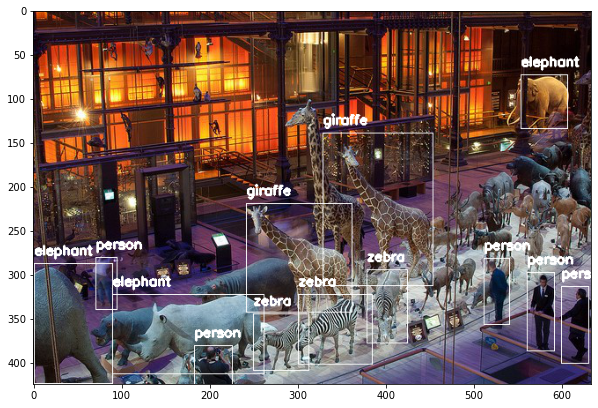

In [42]:
viz(model, 'person_animals.jpg', proba_threshold=0.2)

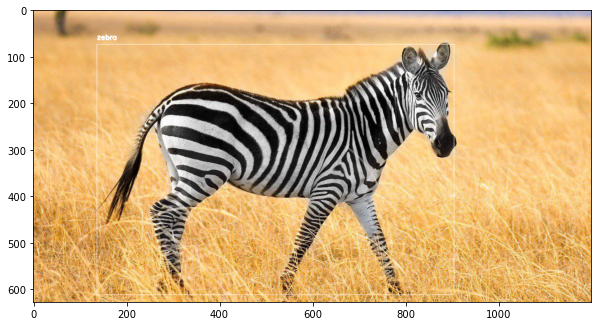

In [43]:
viz(model, 'zebra.jpg', 0.5)

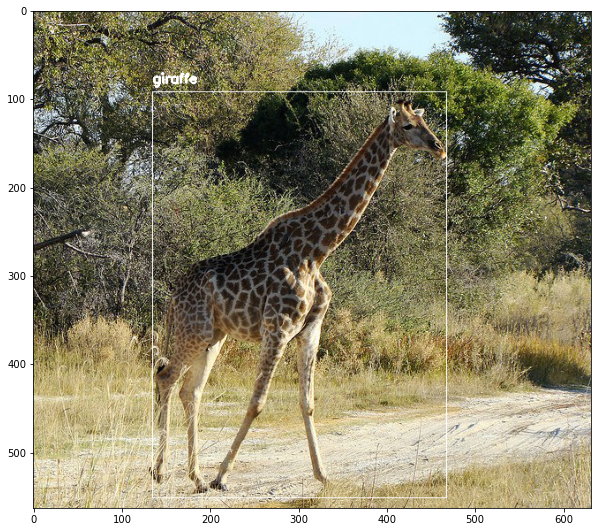

In [44]:
viz(model, 'giraffe.jpg')

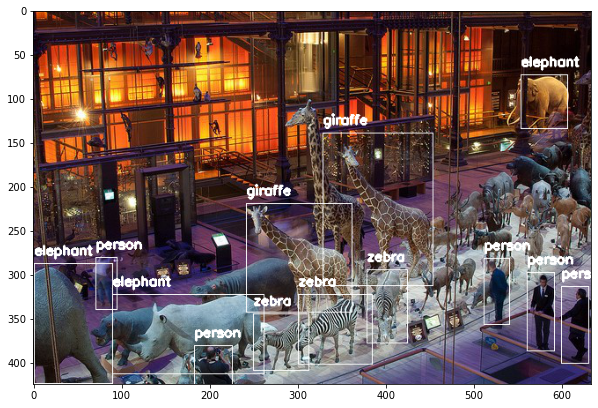

In [45]:
viz(model, 'person_animals.jpg', 0.2)

## try other models

#### efficientdet/lite1 

In [46]:
model1 = hub.KerasLayer('https://tfhub.dev/tensorflow/efficientdet/lite1/detection/1')

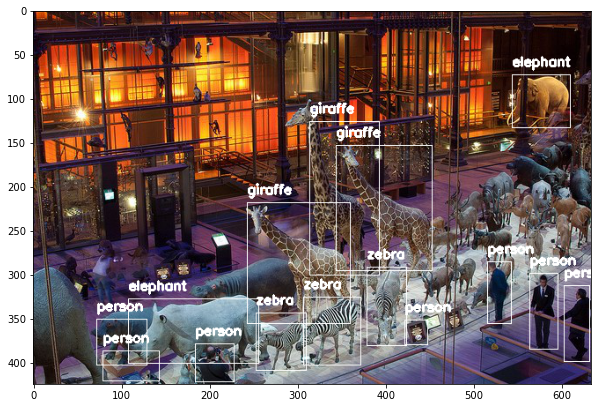

In [49]:
viz(model1, 'person_animals.jpg', 0.2)

####  efficientdet/lite2

In [48]:
model2 = hub.KerasLayer('https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1')

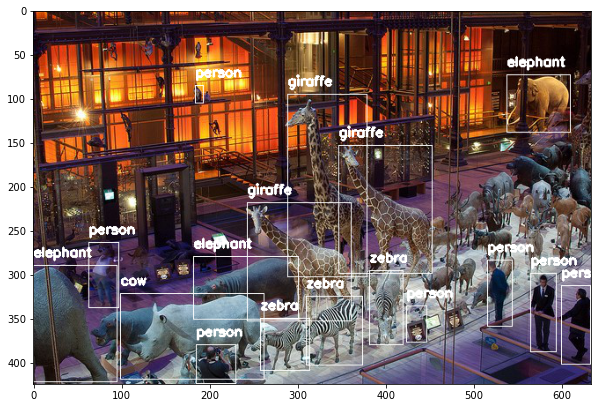

In [51]:
viz(model2, 'person_animals.jpg', 0.2)

####  efficientdet/lite3

In [52]:
model3 = hub.KerasLayer('https://tfhub.dev/tensorflow/efficientdet/lite3/detection/1')

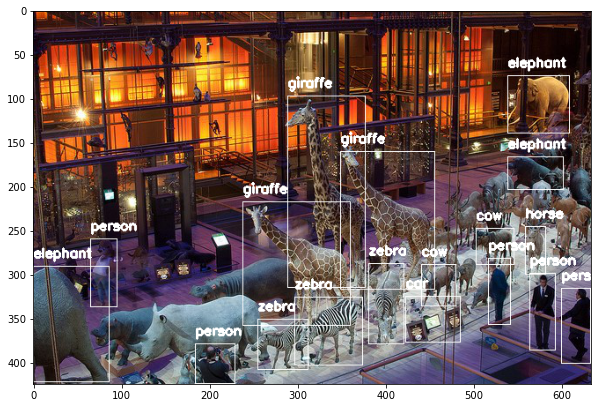

In [53]:
viz(model3, 'person_animals.jpg', 0.2)

####  efficientdet/lite3x

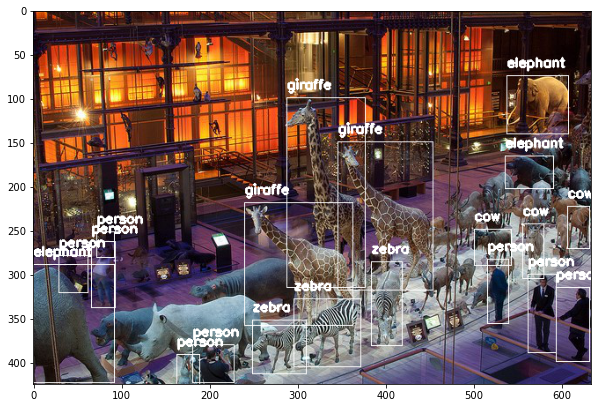

In [58]:
model3x = hub.KerasLayer('https://tfhub.dev/tensorflow/efficientdet/lite3x/detection/1')
viz(model3x, 'person_animals.jpg', 0.2)

####  efficientdet/lite4

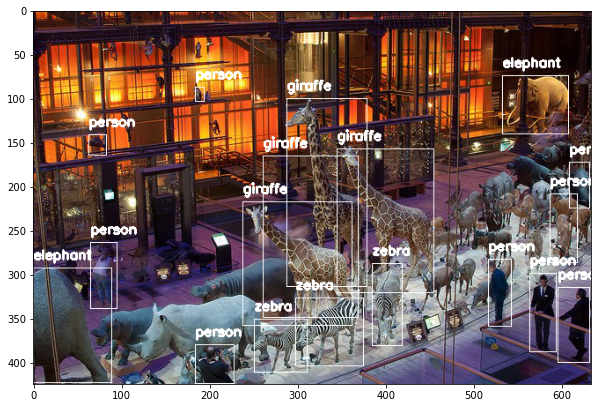

In [59]:
model4 = hub.KerasLayer('https://tfhub.dev/tensorflow/efficientdet/lite4/detection/1')
viz(model4, 'person_animals.jpg', 0.2)

### make a function that outputs the label as either person or animal

In [17]:
def viz_person_animal(model, img_path, proba_threshold=0.5):
    boxes, scores, classes, num_detections = get_prediction(model, img_path)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for i, score in enumerate(scores[0]):
        if score > proba_threshold:
            index = i
            labelindex = int(classes[0][index].numpy()) - 1
            if labelindex == 0:
                label = 'person'
            elif labelindex in (15, 16, 17, 18, 19, 20, 21, 22, 23, 24):
                label = 'animal'
            else:
                label = 'unknown'
            ymin, xmin, width, height = map(int, boxes[0][index].numpy())
            cv2.putText(image, label, (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
            cvrect = cv2.rectangle(image, (xmin, ymin), (height, width), (255,255,255), 1)
    plt.figure(figsize=(10,10))
    plt.imshow(image)

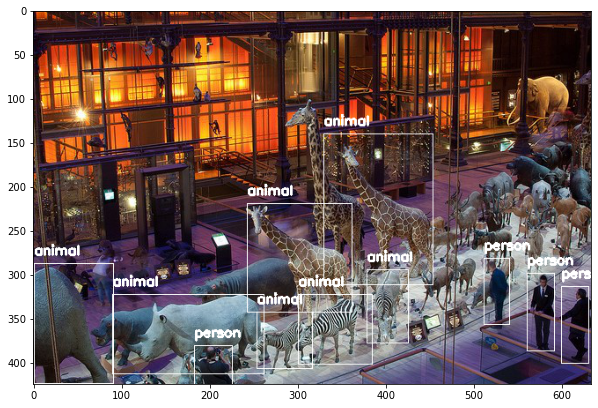

In [18]:
viz_person_animal(model, 'person_animals.jpg', 0.3)

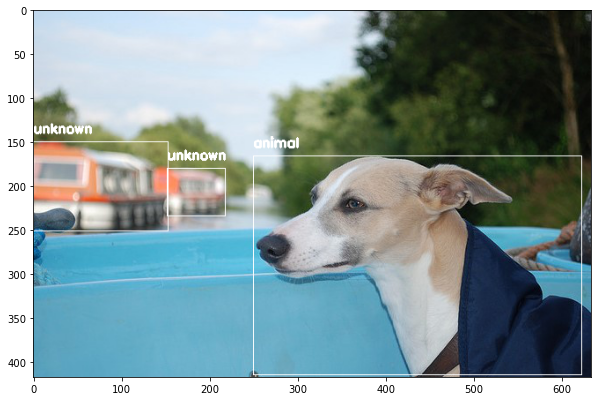

In [19]:
viz_person_animal(model, 'with_unknown_class.jpg', 0.3)

<a class="anchor" id="1"></a>
# load the locally saved model from the .tflite file

In [44]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path='lite-model_efficientdet_lite0_detection_metadata_1.tflite')
interpreter.allocate_tensors()

In [45]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print('input details:\n', input_details)
print('output details:\n', output_details)

input details:
 [{'name': 'serving_default_images:0', 'index': 0, 'shape': array([  1, 320, 320,   3]), 'shape_signature': array([  1, 320, 320,   3]), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.0078125, 127), 'quantization_parameters': {'scales': array([0.0078125], dtype=float32), 'zero_points': array([127]), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
output details:
 [{'name': 'StatefulPartitionedCall:3', 'index': 598, 'shape': array([ 1, 25,  4]), 'shape_signature': array([ 1, 25,  4]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:2', 'index': 599, 'shape': array([ 1, 25]), 'shape_signature': array([ 1, 25]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtyp

In [109]:
output_details[1].keys()

dict_keys(['name', 'index', 'shape', 'shape_signature', 'dtype', 'quantization', 'quantization_parameters', 'sparsity_parameters'])

In [43]:
input_details[0]

{'name': 'serving_default_images:0',
 'index': 0,
 'shape': array([  1, 320, 320,   3]),
 'shape_signature': array([  1, 320, 320,   3]),
 'dtype': numpy.uint8,
 'quantization': (0.0078125, 127),
 'quantization_parameters': {'scales': array([0.0078125], dtype=float32),
  'zero_points': array([127]),
  'quantized_dimension': 0},
 'sparsity_parameters': {}}

In [77]:
image = Image.open('zebra.jpg')
imagetensor = tf.convert_to_tensor(image, dtype=tf.uint8, dtype_hint=None, name=None)
imagetensor_resized = tf.image.resize(
    imagetensor,
    (320, 320),
    method=tf.image.ResizeMethod.BILINEAR,
    preserve_aspect_ratio=False,
    antialias=False,
    name=None
)
imagetensor_expanddim = tf.expand_dims(imagetensor_resized, axis=0, name=None)
imagetensor = tf.cast(imagetensor_expanddim, tf.uint8)

run the cell below. why does inference take so long? in the tfhub link, it says it takes around 50ms with one CPU

In [101]:
interpreter.set_tensor(input_details[0]['index'], imagetensor)
interpreter.invoke()

In [59]:
boxes = interpreter.get_tensor(output_details[0]['index'])
scores = interpreter.get_tensor(output_details[1]['index'])
classes = interpreter.get_tensor(output_details[2]['index'])
num_detections = interpreter.get_tensor(output_details[3]['index'])

In [61]:
boxes.shape

(1, 25, 4)

In [62]:
scores.shape

(1, 25)

In [63]:
classes.shape

(1, 25)

In [64]:
num_detections.shape

(1,)

#### put everything in a function 

In [141]:
def get_pred_tflite(interpreter, img_path):
    image = Image.open('zebra.jpg')
    imagetensor = tf.convert_to_tensor(image, dtype=tf.uint8, dtype_hint=None, name=None)
    imagetensor_resized = tf.image.resize(
        imagetensor,
        (320, 320),
        method=tf.image.ResizeMethod.BILINEAR,
        preserve_aspect_ratio=False,
        antialias=False,
        name=None
    )
    imagetensor_expanddim = tf.expand_dims(imagetensor_resized, axis=0, name=None)
    imagetensor = tf.cast(imagetensor_expanddim, tf.uint8)

    interpreter.set_tensor(input_details[0]['index'], imagetensor)
    interpreter.invoke()
    
    boxes = interpreter.get_tensor(output_details[0]['index'])
    scores = interpreter.get_tensor(output_details[2]['index'])
    classes = interpreter.get_tensor(output_details[1]['index'])
    num_detections = interpreter.get_tensor(output_details[3]['index'])
    
    return boxes, classes, scores, num_detections

In [142]:
model_path='lite-model_efficientdet_lite0_detection_metadata_1.tflite'
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path)
interpreter.allocate_tensors()

In [143]:
boxes, classes, scores, num_detections = get_pred_tflite(interpreter, 'zebra.jpg')

In [144]:
classes

array([[23., 23., 23., 23., 23., 23., 23., 23., 23., 23., 23., 23., 23.,
        23., 23., 23., 23., 23., 23., 23., 23., 23., 23., 23., 23.]],
      dtype=float32)

In [145]:
scores

array([[0.90625   , 0.1171875 , 0.1015625 , 0.0546875 , 0.05078125,
        0.03515625, 0.03515625, 0.03515625, 0.03125   , 0.03125   ,
        0.03125   , 0.03125   , 0.02734375, 0.02734375, 0.0234375 ,
        0.0234375 , 0.0234375 , 0.0234375 , 0.01953125, 0.01953125,
        0.01953125, 0.01953125, 0.01953125, 0.01953125, 0.01953125]],
      dtype=float32)

In [146]:
num_detections

array([25.], dtype=float32)

In [147]:
boxes

array([[[ 1.09715581e-01,  1.35594517e-01,  1.00077951e+00,
          7.53910422e-01],
        [-2.59201974e-04,  4.73437831e-03,  9.25240666e-02,
          8.06245357e-02],
        [-2.40381807e-04,  1.56203359e-02,  9.36978757e-02,
          1.83989644e-01],
        [ 6.47797957e-02,  8.20864320e-01,  1.23923324e-01,
          8.93173099e-01],
        [ 6.17173687e-03,  1.82495415e-02,  1.09645590e-01,
          3.21983993e-01],
        [-5.69585711e-04,  3.95529903e-03,  9.10729021e-02,
          3.46101075e-02],
        [-4.73397970e-03,  2.19389796e-04,  1.44383699e-01,
          4.91968058e-02],
        [ 2.05022246e-01, -7.15157688e-02,  8.38827848e-01,
          3.37290794e-01],
        [-2.43959203e-02, -7.07266852e-04,  2.33578622e-01,
          3.79153639e-02],
        [ 6.34094849e-02,  8.45786512e-01,  1.22553013e-01,
          9.26472962e-01],
        [ 5.50754480e-02,  8.05903733e-01,  1.29153311e-01,
          9.56791222e-01],
        [ 8.54873359e-02,  6.45108819e-02, 

### convert the bounding boxes 

In [148]:
# take the first box, ie the box with the highest class probability
boxes[0][0]

array([0.10971558, 0.13559452, 1.0007795 , 0.7539104 ], dtype=float32)

In [149]:
imwidth, imheight = cv2.imread('zebra.jpg').shape[:2]
imwidth, imheight

(627, 1200)

In [150]:
xmin = boxes[0][0][0] * imheight
ymin = boxes[0][0][1] * imwidth
width = boxes[0][0][2] * imwidth
height = boxes[0][0][3] * imheight
ymin, xmin, width, height

(85.01776215434074, 131.6586971282959, 627.4887524843216, 904.6925067901611)

### put everything in a function

In [179]:
def viz_tflite(interpreter, img_path, proba_threshold=0.5):
    boxes, classes, scores, num_detections = get_pred_tflite(interpreter, img_path)
    image = cv2.imread(img_path)
    imwidth, imheight = image.shape[:2]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for i, score in enumerate(scores[0]):
        if score > proba_threshold:
            index = i
            labelindex = int(classes[0][index])
            if labelindex == 0:
                label = 'person'
            elif labelindex in (15, 16, 17, 18, 19, 20, 21, 22, 23, 24):
                label = 'animal'
            else:
                label = 'unknown'
            xmin = int(boxes[0][0][0] * imheight)
            ymin = int(boxes[0][0][1] * imwidth)
            width = int(boxes[0][0][2] * imwidth)
            height = int(boxes[0][0][3] * imheight)
            cv2.putText(image, label, (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
            cvrect = cv2.rectangle(image, (xmin, ymin), (height, width), (255,255,255), 1)
    plt.figure(figsize=(10,10))
    plt.imshow(image)

In [162]:
model_path='lite-model_efficientdet_lite0_detection_metadata_1.tflite'
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path)
interpreter.allocate_tensors()

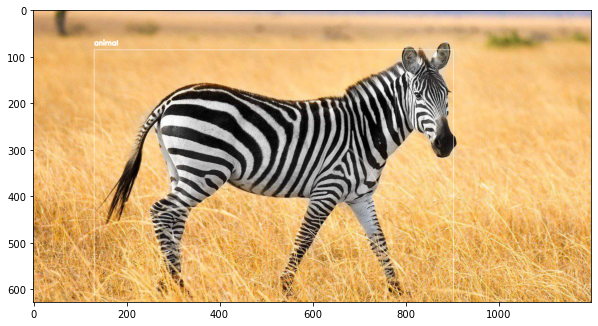

In [180]:
viz_tflite(interpreter, 'zebra.jpg', 0.5)

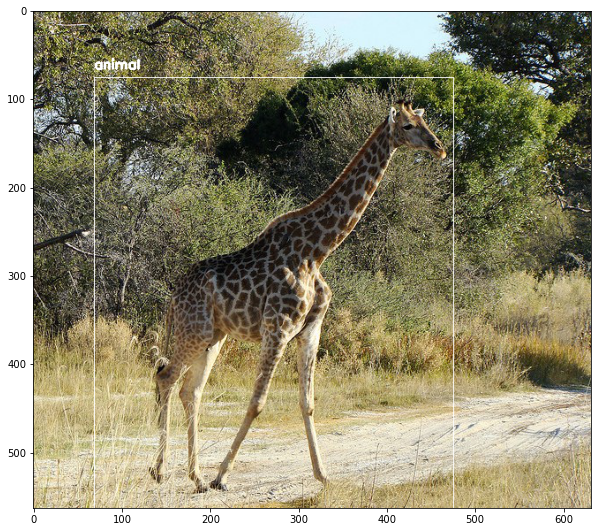

In [181]:
viz_tflite(interpreter, 'giraffe.jpg', 0.5)

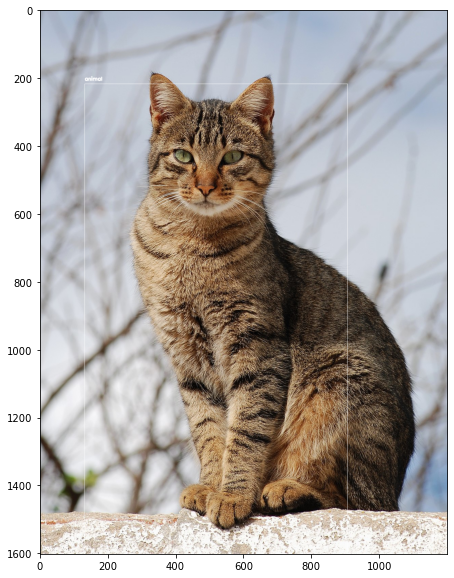

In [183]:
viz_tflite(interpreter, 'cat.jpg')

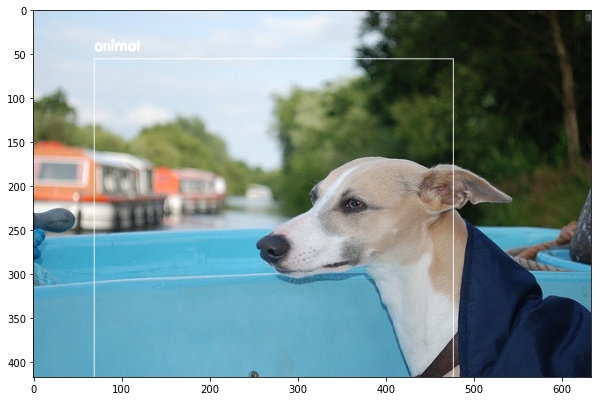

In [185]:
viz_tflite(interpreter, 'with_unknown_class.jpg', 0.2)

### time the interpreter.invoke() method 

In [187]:
import time

In [191]:
model_path='lite-model_efficientdet_lite0_detection_metadata_1.tflite'
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path)
interpreter.allocate_tensors()

In [192]:
image = Image.open('zebra.jpg')
imagetensor = tf.convert_to_tensor(image, dtype=tf.uint8, dtype_hint=None, name=None)
imagetensor_resized = tf.image.resize(
    imagetensor,
    (320, 320),
    method=tf.image.ResizeMethod.BILINEAR,
    preserve_aspect_ratio=False,
    antialias=False,
    name=None
)
imagetensor_expanddim = tf.expand_dims(imagetensor_resized, axis=0, name=None)
imagetensor = tf.cast(imagetensor_expanddim, tf.uint8)

In [193]:
interpreter.set_tensor(input_details[0]['index'], imagetensor)
start = time.perf_counter()
interpreter.invoke()
end = time.perf_counter()
print(end - start)

7.762458299999707


In [194]:
boxes = interpreter.get_tensor(output_details[0]['index'])
scores = interpreter.get_tensor(output_details[2]['index'])
classes = interpreter.get_tensor(output_details[1]['index'])
num_detections = interpreter.get_tensor(output_details[3]['index'])

## appendix 

In [130]:
boxes1, _, _, _ = get_prediction(model, 'zebra.jpg')
boxes1

<tf.Tensor: shape=(1, 100, 4), dtype=float32, numpy=
array([[[7.41441803e+01, 1.37258804e+02, 6.11591125e+02, 9.05919067e+02],
        [6.49140854e+01, 1.44717850e+02, 6.17204346e+02, 9.29920532e+02],
        [3.84459900e+02, 5.33531311e+02, 6.06108337e+02, 7.83238831e+02],
        [3.42135763e+00, 4.42226868e+01, 4.74371338e+01, 3.11001678e+02],
        [2.18492728e-02, 4.71846886e+01, 5.05461311e+01, 1.13025574e+02],
        [6.41695557e+01, 6.90940186e+02, 2.73404877e+02, 9.03762207e+02],
        [3.06301880e+02, 1.50406006e+02, 4.54752228e+02, 2.30878204e+02],
        [8.66343155e+01, 1.65329926e+02, 6.09571899e+02, 9.10306946e+02],
        [3.12865219e+01, 1.84695190e+02, 5.96179581e+01, 2.75044495e+02],
        [1.55603577e+02, 2.44297241e+02, 2.34944321e+02, 4.58843445e+02],
        [4.65199995e+00, 5.34366798e+01, 3.85582542e+01, 1.89383163e+02],
        [3.69058113e+01, 1.00674426e+03, 6.96269531e+01, 1.07547766e+03],
        [0.00000000e+00, 2.78188725e+01, 5.02247353e+01, 8.

In [291]:
boxes, scores, classes, num_detections = get_prediction(model, 'person_animals.jpg')

In [292]:
scores

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[0.603184  , 0.5779627 , 0.57303864, 0.51897055, 0.4857338 ,
        0.47034287, 0.41765776, 0.41340518, 0.39851987, 0.39028877,
        0.38180262, 0.23190492, 0.20326583, 0.1950395 , 0.17586763,
        0.16855754, 0.16526194, 0.1647814 , 0.16107228, 0.16068034,
        0.1605339 , 0.15255283, 0.14908946, 0.14300443, 0.14252321,
        0.1370887 , 0.13375936, 0.12965208, 0.12669073, 0.1261684 ,
        0.1222738 , 0.12186077, 0.12142838, 0.11964393, 0.11949864,
        0.11923932, 0.1161714 , 0.11523449, 0.11046296, 0.10933039,
        0.10776106, 0.1072265 , 0.10664311, 0.10096025, 0.1009175 ,
        0.10071313, 0.10035039, 0.10003623, 0.09933838, 0.09665754,
        0.09542258, 0.09509807, 0.0946907 , 0.09426934, 0.09398162,
        0.09324392, 0.09307286, 0.09116461, 0.08992741, 0.08949963,
        0.08698849, 0.08636895, 0.08536285, 0.08510658, 0.08495257,
        0.0834854 , 0.08232098, 0.08229026, 0.07945722, 0.078472  

In [294]:
proba_threshold = 0.2
for i, score in enumerate(scores[0]):
    if score > proba_threshold:
        print(f'score: {score}, index: {i}')

score: 0.6031839847564697, index: 0
score: 0.5779626965522766, index: 1
score: 0.573038637638092, index: 2
score: 0.5189705491065979, index: 3
score: 0.4857338070869446, index: 4
score: 0.47034287452697754, index: 5
score: 0.4176577627658844, index: 6
score: 0.413405179977417, index: 7
score: 0.3985198736190796, index: 8
score: 0.390288770198822, index: 9
score: 0.38180261850357056, index: 10
score: 0.23190492391586304, index: 11
score: 0.20326583087444305, index: 12


In [273]:
boxes, scores, classes, num_detections = get_prediction(model, 'cat.jpg')

In [274]:
scores

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[0.5861348 , 0.19766977, 0.04472347, 0.03159756, 0.02978539,
        0.02146025, 0.01531869, 0.01242454, 0.00998039, 0.00997353,
        0.0090656 , 0.00905575, 0.00876562, 0.00846238, 0.0079648 ,
        0.00688475, 0.00684233, 0.00618969, 0.00616234, 0.0060263 ,
        0.00598683, 0.00598584, 0.0057689 , 0.00533749, 0.00533645,
        0.0051912 , 0.00516422, 0.00511838, 0.0047547 , 0.00469281,
        0.0046255 , 0.00449699, 0.00443016, 0.00425077, 0.00410483,
        0.00391855, 0.00383482, 0.00375719, 0.00374688, 0.0036721 ,
        0.0036311 , 0.0035776 , 0.00349445, 0.0034637 , 0.00328056,
        0.00309546, 0.00308211, 0.00307737, 0.00292211, 0.00287599,
        0.00285904, 0.0028524 , 0.00280324, 0.00278472, 0.00276315,
        0.00272282, 0.00271299, 0.00268218, 0.00263689, 0.00260597,
        0.00258047, 0.0025325 , 0.00251449, 0.00247976, 0.00244631,
        0.00242948, 0.0024229 , 0.00239765, 0.0023871 , 0.00232326

In [279]:
classes

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[65., 17., 65., 17., 16., 17., 65., 16., 16., 65., 65., 16., 16.,
        17., 65., 17., 88., 65., 62., 17., 16., 65., 16.,  1., 88.,  1.,
        65., 16., 16., 16., 17., 65.,  1., 65., 65.,  1.,  1., 17.,  1.,
        16., 16., 16.,  1., 65., 16.,  1., 65., 16., 16., 16.,  1.,  1.,
        16., 16., 65.,  1., 16., 65., 65., 20.,  1., 16.,  1.,  1., 85.,
        16., 16., 16.,  1., 16.,  1., 65.,  1., 65., 17.,  1.,  1.,  1.,
        65.,  1., 16., 16., 16.,  1., 16.,  1., 67., 16., 16.,  1.,  1.,
        65.,  1., 16., 16.,  1.,  1., 16., 88.,  1.]], dtype=float32)>

In [280]:
labels[17-1]

'cat'